# LOWESS
 *1) Read and Normalize the Dataset
 
 *2) Generate W for every query point!
 
 *3) No tarining data is involved,directly make predictions fromt he closed form solution we derived.
 (X'WX)inv * X'WY where X'=X_Transpose
 
 *4) Find the best value of Tau(Bandwidth parameter) [Cross validation]
 

In [1]:
#Loading Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
dfx=pd.read_csv('../Datasets/Locally Weighted Regression/weightedX.csv')
dfy=pd.read_csv('../Datasets/Locally Weighted Regression/weightedY.csv')

In [4]:
X=dfx.values
Y=dfy.values

In [6]:
print(X.shape,Y.shape)

(99, 1) (99, 1)


In [7]:
#normalise the data
u=X.mean()
std=X.std()
X=(X-u)/std

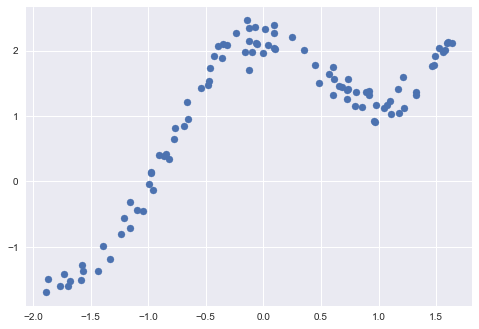

In [9]:
plt.scatter(X,Y)
plt.style.use('seaborn')
plt.show()

# 2. Find out W(mXm) diagonal matrix

In [11]:
#a,b-> matrix a*b->matrix multiplication
#a,b->array   a*b->element wise product

In [12]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [13]:
print(type(np.mat(np.eye(5))))

<class 'numpy.matrix'>


In [14]:
type(np.eye(5))

numpy.ndarray

In [17]:
def getW(query_point,X,tau):
    M=X.shape[0]
    W=np.mat(np.eye(M))
    
    for i in range(M):
        W[i,i]=np.exp(np.dot((X[i]-query_point),(X[i]-query_point).T)/(-2*tau*tau))
    return W

In [19]:
X=np.mat(X)
Y=np.mat(Y)
M=X.shape[0]

W=getW(-1,X,0.5)
print(W.shape)
print(W)

(99, 99)
[[4.37461134e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.35741601e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.34593282e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.29054046e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.78787793e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.21221566e-05]]


# 3.Make Predictions

In [40]:
def predict(X,Y,query_x,tau):
    ones=np.ones((M,1))
    X_=np.hstack((X,ones))
    qx=np.mat([query_x,1])
    W=getW(qx,X_,tau)
    
    theta=np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    #print(theta.shape)
    pred=np.dot(qx,theta)
    return theta,pred
    

In [42]:
theta,pred=predict(X,Y,1.0,1.0)

In [43]:
print(theta)

[[0.14069504]
 [1.45348191]]


In [44]:
print(pred)

[[1.59417694]]


# 4.Visualise Predictions, Analyse the Effect of Tau

In [56]:
def plotPredictions(tau):
    X_test=np.linspace(-2,2,20)
    Y_test=[]
    
    for xq in X_test:
        theta,pred=predict(X,Y,xq,tau)
        Y_test.append(pred[0])
    Y_test=np.array(Y_test)
    
    XO=np.array(X)
    YO=np.array(Y)
    
    plt.scatter(XO,YO)
    plt.title("Tau/Bandwith parameter %0.2f" %tau)
    plt.scatter(X_test,Y_test,color='red')
    plt.show()
    

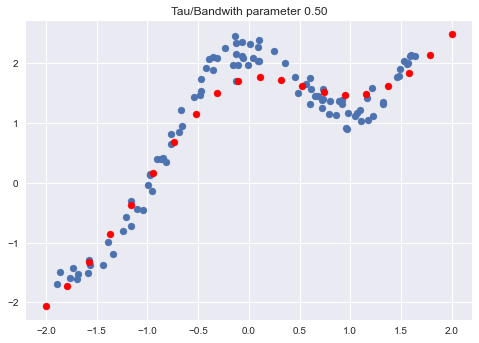

In [57]:
plotPredictions(0.5)

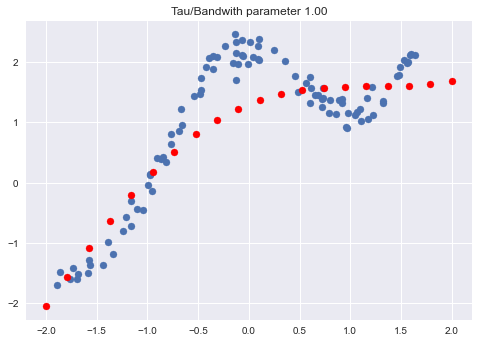

In [58]:
plotPredictions(1.0)

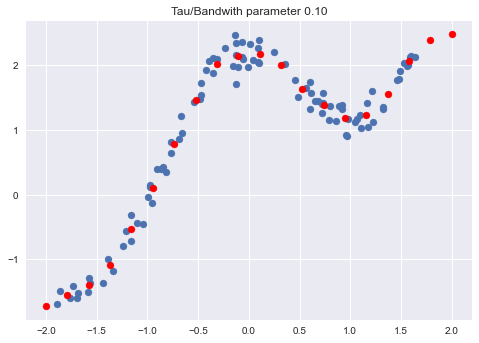

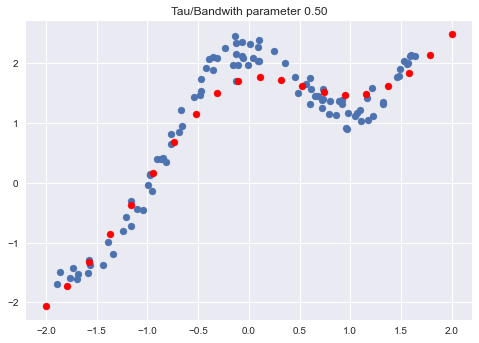

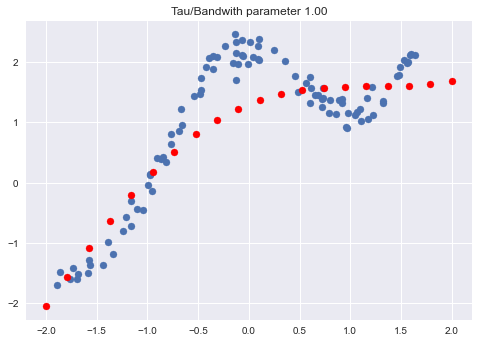

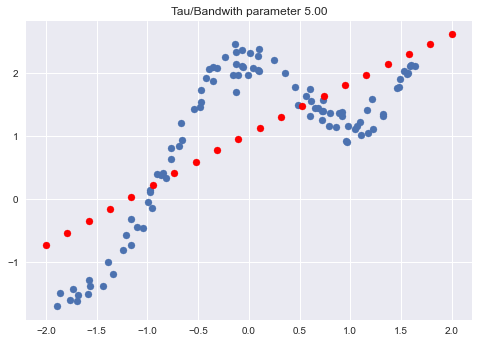

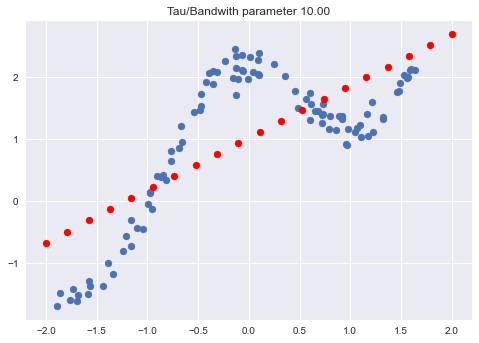

In [59]:
tau=[0.1,0.5,1,5,10]
for i in tau:
 plotPredictions(i)


In [60]:
#As tau inc-> it becomes similar to Linear Regression